____
__Universidad Tecnológica Nacional, Buenos Aires__<br/>
__Ingeniería Industrial__<br/>
__Cátedra de Ciencia de Datos - Curso I5521 - Turno sábado - Grupo 11__<br/>
__Elaborado por: Hugo Britez y Matías Tamborini__
____

# Intervenciones de seguridad vial AUSA 

Seleccionamos un dataset del Gobierno de la Ciudad de Buenos Aires, el cual nos muestra las intervenciones de seguridad vial en las autopistas de AUSA entre 2014 y la actualidad (2020).

Link a dataset: https://data.buenosaires.gob.ar/dataset/seguridad-vial-autopistas-ausa/archivo/juqdkmgo-1872-resource 



In [2]:
#Importamos las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from datetime import datetime


In [ ]:
pwd

In [3]:
#Importamos el dataset mencionado anteriormente
intervenciones = pd.read_csv(r'C:\Users\Matias\Desktop\UTN\Python\Data Science - UTN - Martín Palazzo\TP Anual\intervenciones-de-seguridad-vial.csv')

In [4]:
intervenciones.head(3)

,periodo,fecha,hora,autopista,banda_y_o_ramal,pk,condiciones_meteorologicas,superficie_de_la_via,lesionados,fallecidos,tipo_de_siniestro,moto,liviano,bus,camion
0,201401,2014-01-01,1,AU CAMPORA,ASCENDENTE,600,BUENO,SECA,1,0,COLISION CON OBSTACULO FIJO,0,1,0,0
1,201401,2014-01-01,3,AU DELLEPIANE,DESCENDENTE,600,BUENO,SECA,0,0,COLISION CON OBSTACULO FIJO,0,1,0,0
2,201401,2014-01-01,22,AU 25 DE MAYO,ASCENDENTE,5900,BUENO,SECA,8,0,COLISION CON DOS O MAS VEHICULOS,0,2,0,0


In [16]:
#Obtenemos el tamaño del dataframe
np.shape(intervenciones)
print("El dataset se compone de "+ str(np.shape(intervenciones)[0]) + " renglones y " + str(np.shape(intervenciones)[1]) + " columnas")

El dataset se compone de 6639 renglones y 18 columnas


# 1) Análisis de calidad de datos

In [14]:
# Revisamos si existen columnas que contengan valores faltantes (NaNs o Nulls)
nulos_columnas = intervenciones.isnull().sum()
nulos_columnas

periodo                       0
fecha                         0
hora                          0
autopista                     0
banda_y_o_ramal               0
pk                            0
condiciones_meteorologicas    0
superficie_de_la_via          0
lesionados                    0
fallecidos                    0
tipo_de_siniestro             0
moto                          0
liviano                       0
bus                           0
camion                        0
dia                           0
mes                           0
año                           0
dtype: int64

In [5]:
#Nos aseguramos que la columna fechaa este en formato fecha (datetime)
intervenciones.fecha=pd.to_datetime(intervenciones.fecha)


In [6]:
#Agregamos columnas para tener por separado día, mes y año
intervenciones['dia'] = intervenciones.fecha.dt.day
intervenciones['mes'] = intervenciones.fecha.dt.month
intervenciones['año'] = intervenciones.fecha.dt.year
intervenciones.tail()


,periodo,fecha,hora,autopista,banda_y_o_ramal,pk,condiciones_meteorologicas,superficie_de_la_via,lesionados,fallecidos,tipo_de_siniestro,moto,liviano,bus,camion,dia,mes,año
6634,202007,2020-07-25,20,AU PERITO MORENO,ASCENDENTE,400,BUENO,SECA,1,0,OBSTACULO NO FIJO,0,2,0,0,25,7,2020
6635,202007,2020-07-31,9,AU CAMPORA,ASCENDENTE,1400,BUENO,SECA,1,0,COLISION CON DOS O MAS VEHICULOS,0,1,0,1,31,7,2020
6636,202007,2020-07-31,10,AU FRONDIZI,ASCENDENTE,1300,BUENO,SECA,0,0,SINIESTRO DE UN SOLO VEHICULO / SIN COLISION,1,0,0,0,31,7,2020
6637,202007,2020-07-31,17,AU 25 DE MAYO,DESCENDENTE,7500,BUENO,SECA,1,0,COLISION CON OBSTACULO FIJO,0,0,0,1,31,7,2020
6638,202007,2020-07-31,17,AU DELLEPIANE,ASCENDENTE,500,BUENO,SECA,0,0,OTRO,0,1,0,0,31,7,2020


In [9]:
#Vemos los valores únicos que tiene la superficie de la vía.
print("\n", intervenciones['superficie_de_la_via'].unique())


 ['SECA' 'MOJADA/HUMEDA' 'OTRO' 'INUNDADA' '<SD>']


Para el análisis decidimos reemplazar el valor "INUNDADA" por "MOJADA/HUMEDA". por otro lado "<SD>" siginifica "Sin Datos" por lo tanto los trataremos como Nulls. 

In [7]:
#Vemos los valores que hay en la columna pk
print("\n", intervenciones['pk'].unique())


 ['600' '5900' '5400' '4700' '3800' '4000' '7000' 'RAMAL ENLACE' '5600'
 '3200' '1000' '10300' 'RAMPA ACCESO' '9050' 'RAMPA EGRESO' '2000' '10200'
 '200' '4500' '8600' '1700' '1600' '5800' '4300' '7500' '8800' 'RAMAL 5'
 '5000' '300' '0' '5300' '2500' '5500' '7400' '2800' '9200' '2100'
 'RAMAL 2BIS' '700' '2700' '1800' '5100' '1300' '500' '7700' '3300' '3700'
 '8200' '6000' '8500' '3600' '2400' '9000' '3500' '6600' '9100' '6900'
 '800' '1100' '9600' '7200' '10100' '1200' '6500' '100' '3000' '5200'
 '2300' '1500' '4600' '7800' 'PUENTE S. ORTIZ' '1400' '2600' '3400' '7100'
 '400' '4200' '900' '401' '9300' '4900' '8400' '5700' '9800' '8700' '8000'
 '6100' '4800' '7600' '8300' '9400' '3100' '2900' '2200' '8100' '1900'
 '8900' 'RAMAL 3' '6200' '6300' '4400' '10400' '3900' '2599' '7300'
 'RAMAL 2' '9700' '6800' 'RAMAL 4' '6400' '9900' '9500' 'RAMAL 8' '4100'
 '550' '3150' '10500' 'RAMAL 1BIS' '1350' '6700' '5550' '8550' '10000'
 'RAMAL 2/1' '7900' 'RAMAL 2/2BIS' '450' 'RAMAL 1' '350' '860' 

In [8]:
print("\n", intervenciones['banda_y_o_ramal'].unique())


 ['ASCENDENTE' 'DESCENDENTE' 'TRANSICION RAMAL 2' 'TRANSICION RAMAL 4'
 'TRANSICION RAMAL 3' 'DISTRIBUIDOR 9 DE JULIO' 'PUENTE SCALABRINI ORTIZ'
 'DISTRIBUIDOR UDAONDO' 'TRANSICION RAMAL 1' 'DISTRIBUIDOR DELLEPIANE'
 'CARRIL METROBUS' 'PUENTE ANGEL LABRUNA' 'RAMAL 1 BIS' 'RAMAL 2 BIS'
 'RAMAL 6' 'RAMAL DE ENLACE' ' ' 'RAMAL 4' 'RAMAL DE ENLACE (AU1/AU6)'
 'RAMAL 3/4' 'RAMAL 8' 'RAMAL DE EGRESO' 'RAMAL 1' 'RAMAL 3'
 'PTE. LABRUBNA' '-' 'DIST. NORTE - RAMAL 4' 'DIST. SUR - RAMAL 1'
 'RAMAL 12' 'DIST. SUR - RAMAL 2' 'RAMAL 11']


En este primer análisis no vemos útil la información de las columnas "banda_y_o_ramal" y "pk", por lo tanto tampoco creemos que valga la pena destinar tiempo a normalizarla/limpiarla.

# 2) Análisis descriptivo

      2.1) 
      2.2)
      2.3)
      2.4)

### 2.1) Gráficos comparativo Lesionados vs Fallecidos

In [9]:
#Agrupamos por año la cantidad de lesionados y fallecidos
intervenciones_x_año = intervenciones.groupby(["año"])["lesionados", "fallecidos"].sum()
intervenciones_x_año

<ipython-input-9-d5830e399394>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  intervenciones_x_año = intervenciones.groupby(["año"])["lesionados", "fallecidos"].sum()


,lesionados,fallecidos
año,,
2014,684,6
2015,716,12
2016,683,9
2017,743,14
2018,579,5
2019,477,6
2020,116,3


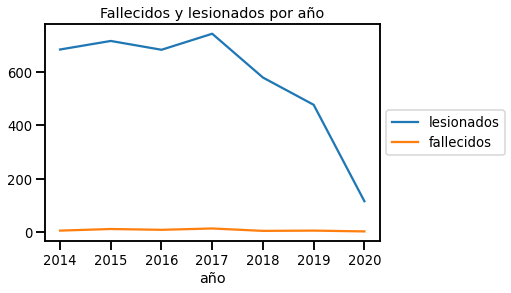

In [10]:
#Gráfico comparativo de lesionados y fallecidos por año
sns.set_context("talk", font_scale=0.8)
intervenciones_x_año.plot(title = "Fallecidos y lesionados por año" )
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Los ultimos 3 años hay una tendencia a la baja de los lesionados

<ipython-input-31-8e5f0ac58c25>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  intervenciones_x_mes = intervenciones.groupby(["mes"])["lesionados", "fallecidos"].sum()


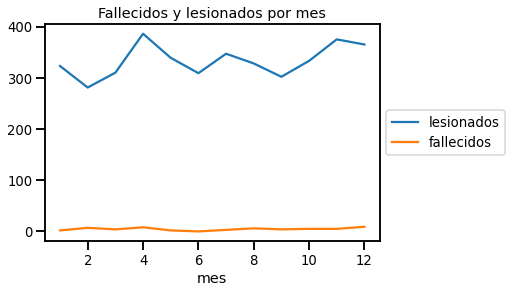

In [31]:
#Agrupamos por meses la cantidad de lesionados y fallecidos
intervenciones_x_mes = intervenciones.groupby(["mes"])["lesionados", "fallecidos"].sum()

sns.set_context("talk", font_scale=0.8)
intervenciones_x_mes.plot(title = "Fallecidos y lesionados por mes" )
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

En Abril está el pico, posible relación con Semana Santa 

<ipython-input-32-81b5cb430adc>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  intervenciones_x_dia = intervenciones.groupby(["dia"])["lesionados", "fallecidos"].sum()


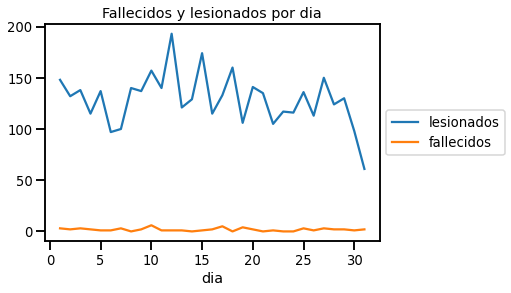

In [32]:
#Agrupamos por día la cantidad de lesionados y fallecidos
intervenciones_x_dia = intervenciones.groupby(["dia"])["lesionados", "fallecidos"].sum()

sns.set_context("talk", font_scale=0.8)
intervenciones_x_dia.plot(title = "Fallecidos y lesionados por dia" )
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

###     2.2)  BoxPlots 

In [22]:

dataset_agrupado_ramal = intervenciones.groupby(["mes","banda_y_o_ramal"],as_index=False)["lesionados", "fallecidos"].sum()
dataset_agrupado_ramal.head(3)

<ipython-input-22-fd75ac0c3034>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dataset_agrupado_ramal = intervenciones.groupby(["mes","banda_y_o_ramal"],as_index=False)["lesionados", "fallecidos"].sum()


,mes,banda_y_o_ramal,lesionados,fallecidos
0,1,ASCENDENTE,161,1
1,1,DESCENDENTE,143,1
2,1,DIST. SUR - RAMAL 1,1,0


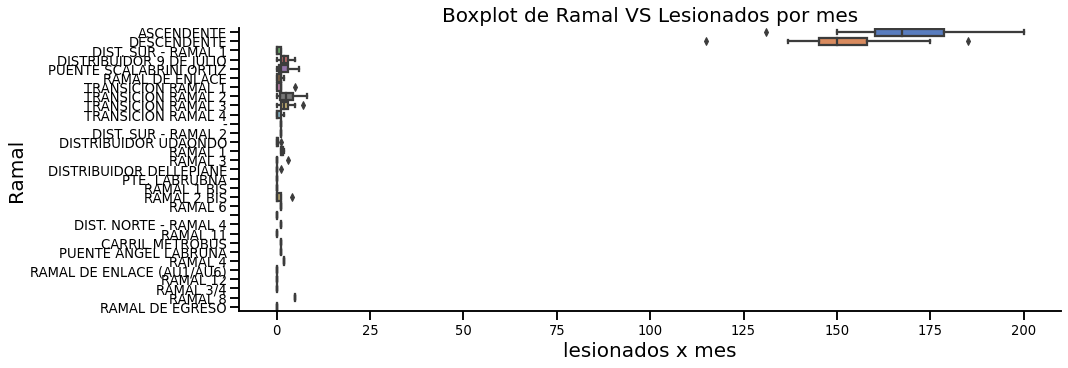

In [20]:
box_autopsita = sns.catplot(x="lesionados",y="banda_y_o_ramal",
                data=dataset_agrupado_ramal, 
                kind="box",
                palette = "muted",
                height = 5 ,aspect=3)
plt.xlabel("lesionados x mes",size = 20)
plt.ylabel("Ramal",size = 20)
plt.title('Boxplot de Ramal VS Lesionados por mes',size = 20)
plt.show()

In [21]:
dataset_agrupado_periodo_autopista = intervenciones.groupby(["periodo","autopista"],as_index=False)["lesionados", "fallecidos"].sum()
dataset_agrupado_periodo_autopista.head(3)

<ipython-input-21-2eb36e551b6a>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dataset_agrupado_periodo_autopista = intervenciones.groupby(["periodo","autopista"],as_index=False)["lesionados", "fallecidos"].sum()


,periodo,autopista,lesionados,fallecidos
0,201401,AU 25 DE MAYO,20,1
1,201401,AU CAMPORA,1,0
2,201401,AU DELLEPIANE,5,0


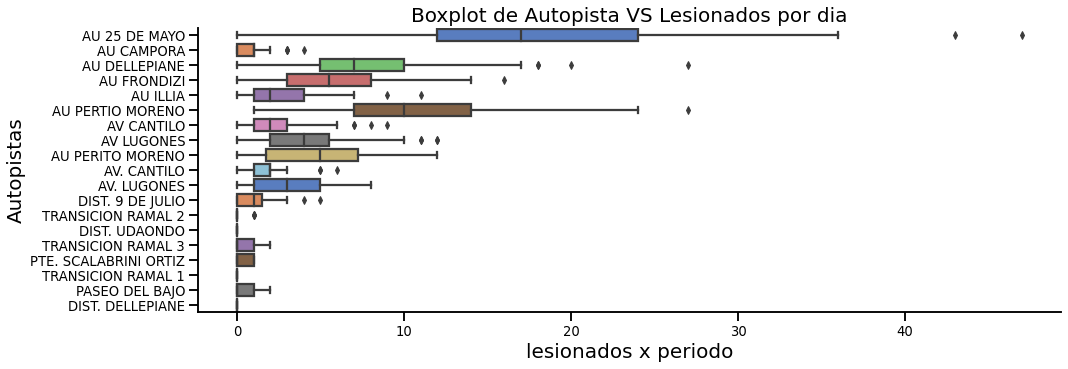

In [17]:
box_autopista = sns.catplot(x="lesionados",y="autopista",
                data=dataset_agrupado_periodo_autopista, 
                kind="box",
                palette = "muted",
                height = 5 ,aspect=3)


plt.xlabel("lesionados x periodo",size = 20)
plt.ylabel("Autopistas",size = 20)
plt.title('Boxplot de Autopista VS Lesionados por dia',size = 20)
plt.show()

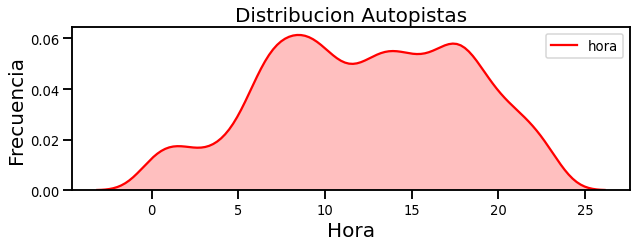

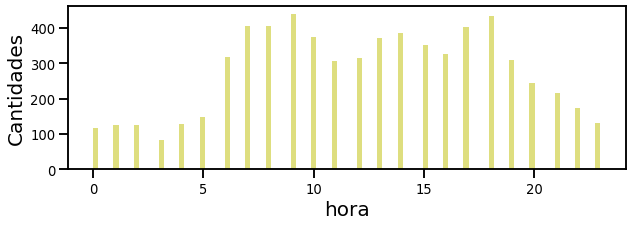

In [29]:
# Distribucion de accidentes por hora
plt.figure(figsize=(10,3))
g = sns.kdeplot(intervenciones.hora, color="red", shade = True)
plt.xlabel("Hora",size = 20)
plt.ylabel("Frecuencia",size = 20)
plt.title('Distribucion Autopistas',size = 20)
plt.show()

# En este segundo plot vamos a ver el histograma de la cantidad de accidentes enfuncion de la hora.
# El parametro bins define la cantidad de sub-intervalos en los que vamos a dividir el eje-x, es decir las barritas.
plt.figure(figsize=(10,3))
plt.hist(intervenciones['hora'], bins=100,color='y' ,alpha=0.5)
plt.xlabel("hora",size = 20)
plt.ylabel("Cantidades",size = 20)
plt.show()

Horas pico mayor cantidad de accidentes

### 2.3) Heatmap

In [25]:
pivot0 = pd.pivot_table(intervenciones, values = 'lesionados', columns = 'autopista', index = 'periodo',fill_value=0, aggfunc = np.sum)
pivot0

autopista,AU 25 DE MAYO,AU CAMPORA,AU DELLEPIANE,AU FRONDIZI,AU ILLIA,AU PERITO MORENO,AU PERTIO MORENO,AV CANTILO,AV LUGONES,AV. CANTILO,AV. LUGONES,DIST. 9 DE JULIO,DIST. DELLEPIANE,DIST. UDAONDO,PASEO DEL BAJO,PTE. SCALABRINI ORTIZ,TRANSICION RAMAL 1,TRANSICION RAMAL 2,TRANSICION RAMAL 3
año,,,,,,,,,,,,,,,,,,,
2014,263,14,96,82,23,0,134,23,49,0,0,0,0,0,0,0,0,0,0
2015,265,1,93,83,34,0,145,33,62,0,0,0,0,0,0,0,0,0,0
2016,219,7,143,78,39,0,130,32,35,0,0,0,0,0,0,0,0,0,0
2017,295,4,126,62,41,0,114,30,71,0,0,0,0,0,0,0,0,0,0
2018,201,6,97,76,32,57,19,14,14,25,27,9,0,0,0,0,0,0,2
2019,142,7,69,71,26,74,0,0,0,14,55,9,0,0,2,1,0,2,5
2020,38,4,13,14,9,13,0,0,0,6,11,1,0,0,4,1,0,1,1


In [26]:
correlacion = pivot0.corr()

In [27]:
correlacion.head(5)

autopista,AU 25 DE MAYO,AU CAMPORA,AU DELLEPIANE,AU FRONDIZI,AU ILLIA,AU PERITO MORENO,AU PERTIO MORENO,AV CANTILO,AV LUGONES,AV. CANTILO,AV. LUGONES,DIST. 9 DE JULIO,DIST. DELLEPIANE,DIST. UDAONDO,PASEO DEL BAJO,PTE. SCALABRINI ORTIZ,TRANSICION RAMAL 1,TRANSICION RAMAL 2,TRANSICION RAMAL 3
autopista,,,,,,,,,,,,,,,,,,,
AU 25 DE MAYO,1.000000,0.125440,0.837218,0.782359,0.803786,-0.407614,0.820342,0.864638,0.890507,-0.368707,-0.470846,-0.321847,NaN,NaN,-0.936737,-0.873337,NaN,-0.688124,-0.480472
AU CAMPORA,0.125440,1.000000,0.142881,0.290126,-0.187577,0.035819,0.104492,-0.079282,-0.081813,-0.018694,0.038594,0.040834,NaN,NaN,-0.178925,-0.108191,NaN,-0.022366,0.040899
AU DELLEPIANE,0.837218,0.142881,1.000000,0.753823,0.927937,-0.290579,0.696683,0.820240,0.649305,-0.255644,-0.360990,-0.204636,NaN,NaN,-0.898689,-0.814097,NaN,-0.615955,-0.374984
AU FRONDIZI,0.782359,0.290126,0.753823,1.000000,0.698108,0.039701,0.569925,0.598802,0.467744,-0.012510,-0.026249,0.115001,NaN,NaN,-0.879348,-0.677779,NaN,-0.381674,-0.042635
AU ILLIA,0.803786,-0.187577,0.927937,0.698108,1.000000,-0.160126,0.578508,0.768467,0.640052,-0.145844,-0.229704,-0.080034,NaN,NaN,-0.838131,-0.724623,NaN,-0.510047,-0.245488


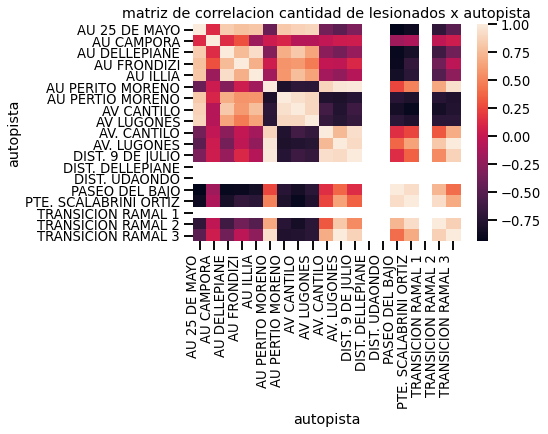

In [33]:
corr = sns.heatmap(correlacion, xticklabels=1, yticklabels=1)
corr.set_xticklabels(corr.get_xticklabels(), rotation=90, ha="right")
plt.title("matriz de correlacion cantidad de lesionados x autopista")
plt.show()

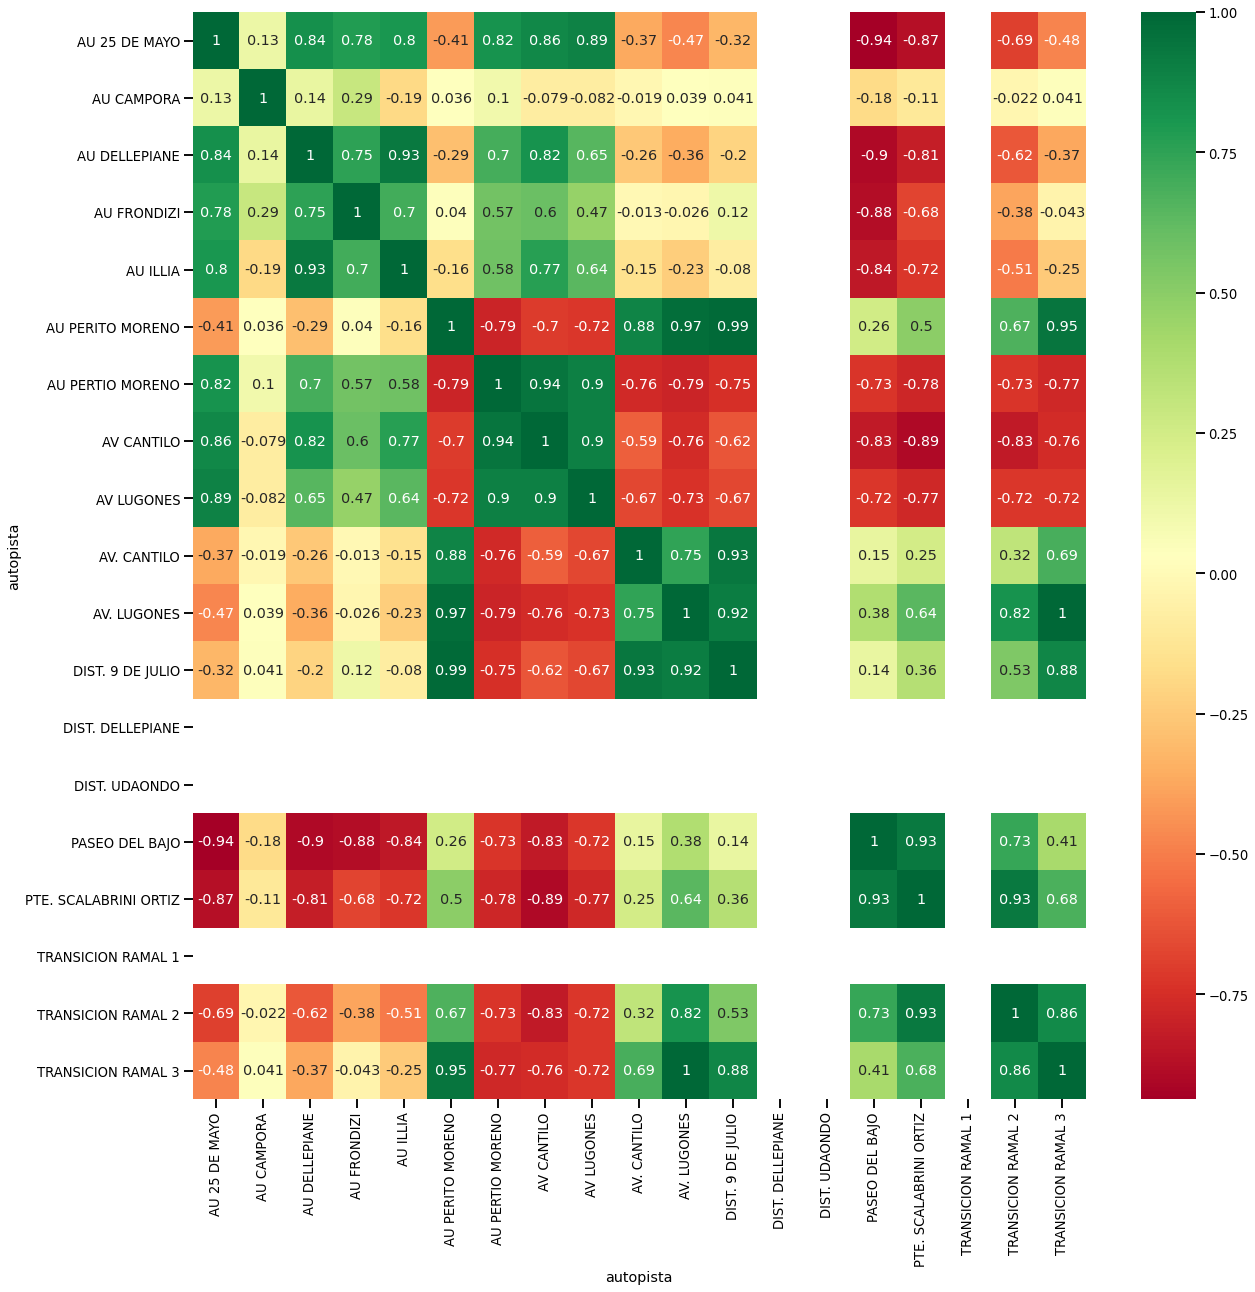

In [36]:
#Otro formato matriz de correlacion 
plt.figure(figsize=(20,20))
g = sns.heatmap(correlacion,annot=True,cmap="RdYlGn")



Conclusiones:

### 2.4) Countplots

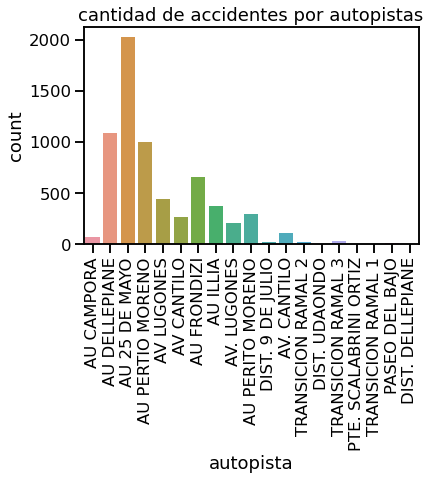

In [80]:
#Cantidad de accidentes por autopista
sns.set_context("talk")
az = sns.countplot(x="autopista", data=intervenciones)
plt.xticks(rotation=90)
plt.title("cantidad de accidentes por autopistas")
plt.show()

### Vemos la incidencia del estado de la autopista 

In [37]:
pivot01 = pd.pivot_table(intervenciones, values = 'lesionados', columns = 'superficie_de_la_via', index = 'mes',fill_value=0, aggfunc = np.sum)
pivot01

superficie_de_la_via,<SD>,INUNDADA,MOJADA/HUMEDA,OTRO,SECA
mes,,,,,
1,0,0,27,3,293
2,0,0,33,2,246
3,0,0,32,2,276
4,0,0,51,0,335
5,0,0,61,0,278
6,0,0,37,1,271
7,0,0,43,0,304
8,0,0,26,0,302
9,0,0,40,0,262


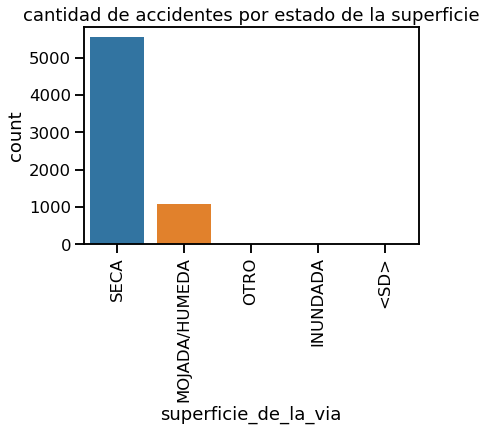

In [35]:
sns.set_context("talk")
az = sns.countplot(x="superficie_de_la_via", data=intervenciones)
plt.xticks(rotation=90)
plt.title("cantidad de accidentes por estado de la superficie")
plt.show()

La condición de la autopista no parece tener una realación proporcional a la cantidad de accidentes. Por lo menos, este gráfico no lo demuestra.

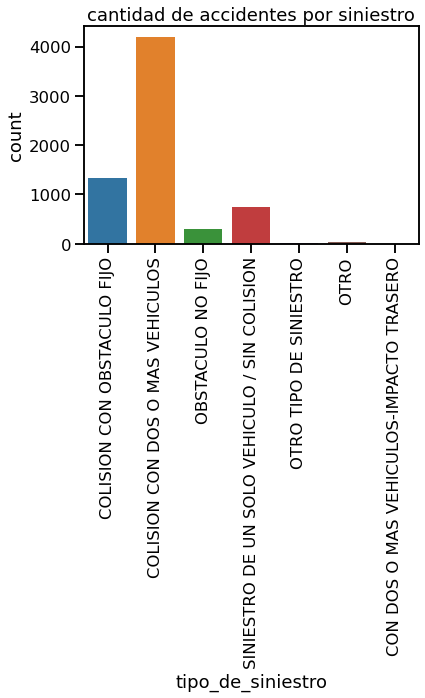

In [38]:
sns.set_context("talk")
az = sns.countplot(x="tipo_de_siniestro", data=intervenciones)
plt.xticks(rotation=90)
plt.title("cantidad de accidentes por siniestro")
plt.show()